<a href="https://colab.research.google.com/github/Shilpasanthi/Credit-Vegrow/blob/main/Fullstack_Customer_EDA_20th_June_2025_Initial_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# This will prompt you to upload a file manually
uploaded = files.upload()


Saving Fullstack_Customer EDA-20th June 2025 -Initial File.xlsx to Fullstack_Customer EDA-20th June 2025 -Initial File.xlsx


In [ ]:
import pandas as pd
import numpy as np

# Disable scientific notation globally
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)


In [ ]:
import pandas as pd

# Get the uploaded filename
file_name = list(uploaded.keys())[0]  # Gets the first uploaded file name

# Load the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Drop auto-generated index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the first few rows
df.head()


,classification,product_category,customer_id,customer_name,Total Sales,Total payments,Total_OS,OS DPI 1-15,OS DPI 16-30,OS DPI 31-45,OS DPI 45-60,OS DPI 60-110,OS DPI 110+,OS DPI 30+,% OS DPI 30+
0,Continued Business (Non Exports),Pomegranate,932,INIYA FRUITS AND VEGETABLES,297698873.21,291706756.21,5992117.00,4402741.94,1589375.06,0.00,0,0.00,0.00,0.00,0.00
1,Continued Business (Non Exports),Imported,826,Eesha Agro Tech Vizianagaram,191212754.07,173926185.47,17286568.60,0.00,4434476.80,8498071.75,0,0.00,0.00,12852091.80,0.07
2,Continued Business (Non Exports),Imported,623,FRESH PICKS - KIRAN N,174992474.94,160267731.94,14724743.00,0.00,11079402.00,2664375.00,0,0.00,0.00,3645341.00,0.02
3,Continued Business (Non Exports),Apple,1864,New Delhi Simla Fruit Traders,171729463.82,171711318.82,18145.00,0.00,0.00,0.00,0,0.00,0.00,18145.00,0.00
4,Discountinued Businesses,Banana,555,FRESH FOR HEALTH,154373190.96,90039001.09,64334189.87,0.00,0.00,0.00,0,0.00,64334189.87,64334189.87,0.42


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ----------- 1. Basic Info & Sanity Checks --------------
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   classification    1000 non-null   object 
 1   product_category  1000 non-null   object 
 2   customer_id       1000 non-null   int64  
 3   customer_name     1000 non-null   object 
 4   Total Sales       1000 non-null   float64
 5   Total payments    1000 non-null   float64
 6   Total_OS          1000 non-null   float64
 7   OS DPI 1-15       1000 non-null   float64
 8   OS DPI 16-30      1000 non-null   float64
 9   OS DPI 31-45      1000 non-null   float64
 10  OS DPI 45-60      1000 non-null   int64  
 11  OS DPI 60-110     1000 non-null   float64
 12  OS DPI 110+       1000 non-null   float64
 13  OS DPI 30+        1000 non-null   float64
 14  % OS DPI 30+      1000 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 117.3+ KB
None
       customer_id  Total

In [ ]:
# Check for duplicates or nulls
print("Nulls:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())



Nulls:
 classification      0
product_category    0
customer_id         0
customer_name       0
Total Sales         0
Total payments      0
Total_OS            0
OS DPI 1-15         0
OS DPI 16-30        0
OS DPI 31-45        0
OS DPI 45-60        0
OS DPI 60-110       0
OS DPI 110+         0
OS DPI 30+          0
% OS DPI 30+        0
dtype: int64
Duplicates: 0


In [ ]:
# ----------- 2. Derived Metrics --------------------------
df["Collection Efficiency"] = df["Total payments"] / (df["Total payments"] + df["Total_OS"])
df["Total_OS_DPD_Buckets"] = df[[col for col in df.columns if col.startswith("OS DPI") and "+" not in col]].sum(axis=1)



In [ ]:
# ----------- 3. Segmentation Summary ---------------------
group_cols = ["classification", "product_category"]
agg_cols = {
    "Total Sales": "mean",
    "Total payments": "mean",
    "Total_OS": "mean",
    "% OS DPI 30+": "mean",
    "Collection Efficiency": "mean"
}

segment_summary = df.groupby(group_cols).agg(agg_cols).reset_index()

# Sort by Collection Efficiency in descending order
segment_summary = segment_summary.sort_values("Collection Efficiency", ascending=False)

display(segment_summary)

,classification,product_category,Total Sales,Total payments,Total_OS,% OS DPI 30+,Collection Efficiency
6,Discountinued Businesses,Custard Apple,1093641.17,1093641.17,0.00,0.00,1.00
13,Discountinued Businesses,Others,829354.05,829354.05,0.00,0.00,1.00
16,Exports Business,Grapes Export,461168.16,461168.16,0.00,0.00,1.00
10,Discountinued Businesses,Market Place,2700853.40,2700853.40,0.00,0.00,1.00
2,Continued Business (Non Exports),Mango,5630158.31,5467603.93,162554.37,0.01,0.98
8,Discountinued Businesses,Guava,1936433.93,1921549.32,14884.62,0.02,0.98
9,Discountinued Businesses,Kinnow,1441613.25,1392275.30,49337.94,0.03,0.97
14,Discountinued Businesses,Sweet Lime,3502863.03,3437776.00,65087.02,0.05,0.95
1,Continued Business (Non Exports),Imported,5700767.32,5365628.98,335138.34,0.03,0.95
0,Continued Business (Non Exports),Apple,6063362.43,5923255.56,140106.86,0.05,0.95


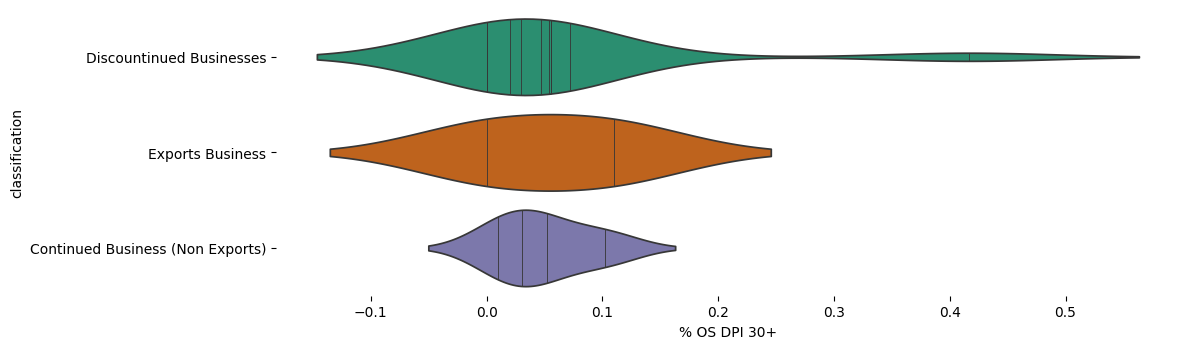

In [ ]:
# @title classification vs % OS DPI 30+

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(segment_summary['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(segment_summary, x='% OS DPI 30+', y='classification', inner='stick', palette='Dark2', hue='classification', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()
plt.show()

# Prepare data

### Subtask:
Count the occurrences of each product category within each classification.


**Reasoning**:
Group the DataFrame by 'classification' and 'product_category', count the occurrences, reset the index, and rename the count column to prepare the data for plotting.



In [ ]:
product_classification_counts = df.groupby(['classification', 'product_category']).size().reset_index(name='count')
display(product_classification_counts)

,classification,product_category,count
0,Continued Business (Non Exports),Apple,127
1,Continued Business (Non Exports),Imported,264
2,Continued Business (Non Exports),Mango,74
3,Continued Business (Non Exports),Pomegranate,174
4,Discountinued Businesses,Banana,1
5,Discountinued Businesses,Coconut,61
6,Discountinued Businesses,Custard Apple,7
7,Discountinued Businesses,Grapes,56
8,Discountinued Businesses,Guava,26
9,Discountinued Businesses,Kinnow,34


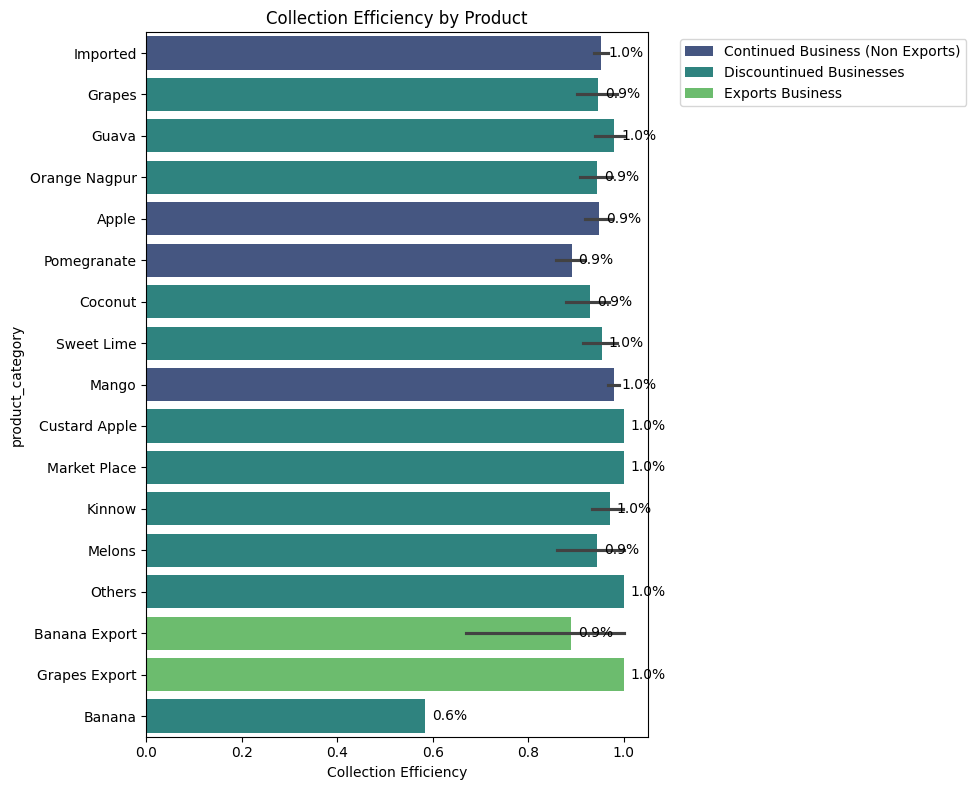

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 'Collection Efficiency' in descending order
df_sorted = df.sort_values('Collection Efficiency', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_sorted, x='Collection Efficiency', y='product_category', hue='classification', palette='viridis')
plt.title('Collection Efficiency by Product')

# Add percentage labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


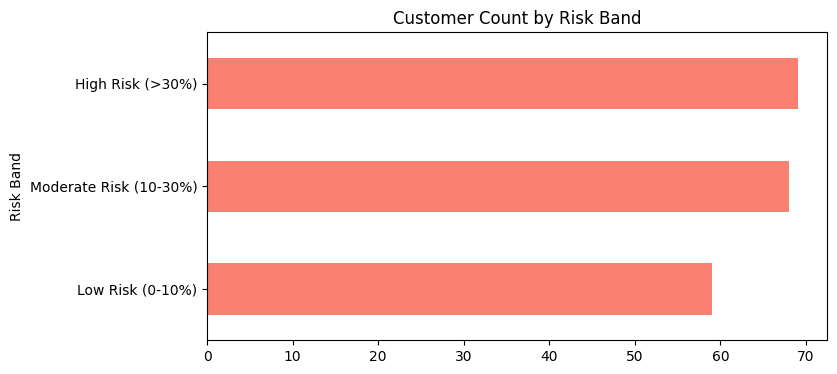

/tmp/ipython-input-162821519.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_os, x="Total_OS", y="customer_name", palette="Reds_r")


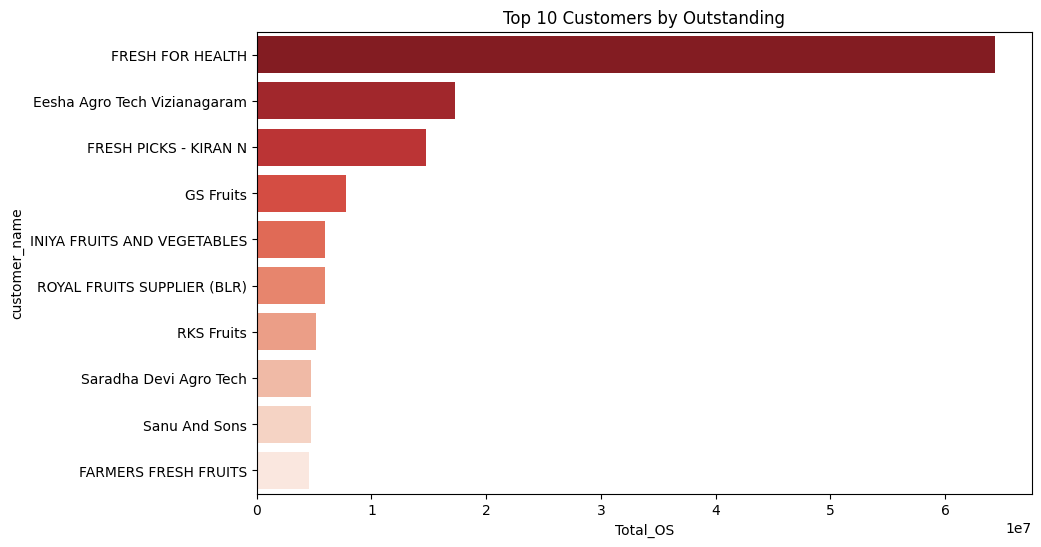

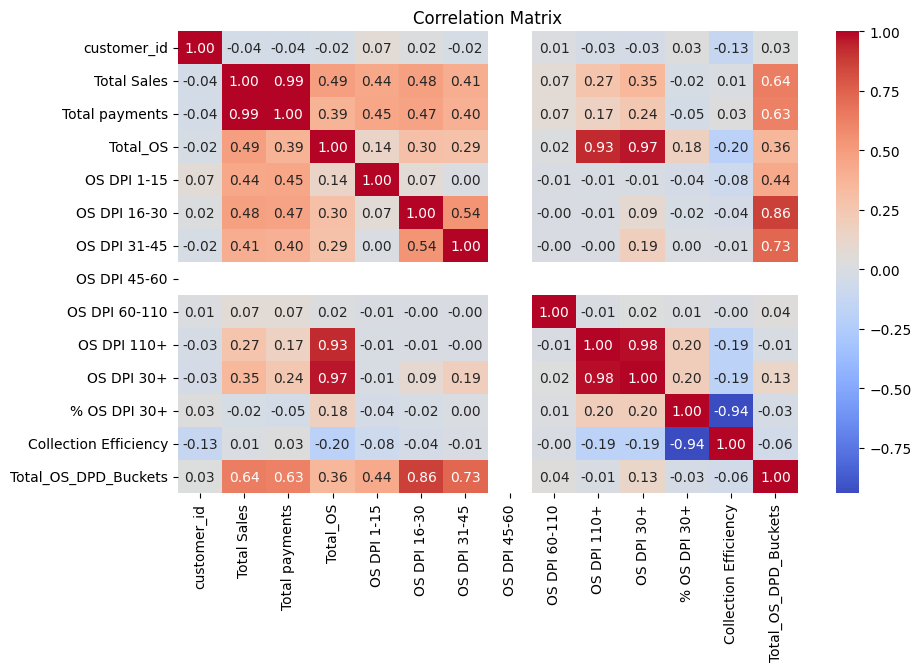

In [ ]:
# Risk Band Classification
bins = [0, 0.1, 0.3, 1]
labels = ["Low Risk (0-10%)", "Moderate Risk (10-30%)", "High Risk (>30%)"]
df["Risk Band"] = pd.cut(df["% OS DPI 30+"], bins=bins, labels=labels)
risk_counts = df["Risk Band"].value_counts().sort_index()
risk_counts.plot(kind="barh", color="salmon", figsize=(8,4), title="Customer Count by Risk Band")
plt.show()

# ----------- 5. Top & Bottom Customers -------------------
top_os = df.sort_values("Total_OS", ascending=False).head(10)
top_risky = df.sort_values("% OS DPI 30+", ascending=False).head(10)
low_eff = df.sort_values("Collection Efficiency").head(10)

# Horizontal Bar Chart for Top OS
plt.figure(figsize=(10, 6))
sns.barplot(data=top_os, x="Total_OS", y="customer_name", palette="Reds_r")
plt.title("Top 10 Customers by Outstanding")
plt.show()

# ----------- 6. Correlation Heatmap ----------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
def classify_dpd(row):
    if row["OS DPI 110+"] > 0:
        return "180+"
    elif row["OS DPI 60-110"] > 0:
        return "91–180"
    elif row["OS DPI 45-60"] > 0:
        return "61–90"
    elif row["OS DPI 31-45"] > 0:
        return "31–60"
    elif row["OS DPI 16-30"] > 0:
        return "16–30"
    elif row["OS DPI 1-15"] > 0:
        return "1–15"
    else:
        return "0"

df["DPD Risk Band"] = df.apply(classify_dpd, axis=1)


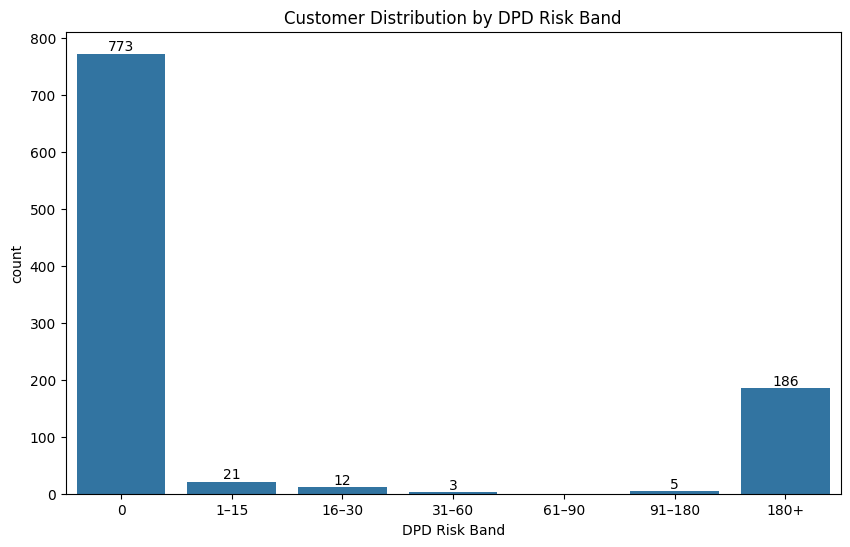

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Enhanced chart size
ax = sns.countplot(data=df, x='DPD Risk Band', order=["0", "1–15", "16–30", "31–60", "61–90", "91–180", "180+"])
plt.title("Customer Distribution by DPD Risk Band")

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
# Calculate counts of each DPD Risk Band
dpd_counts_table = df["DPD Risk Band"].value_counts().reset_index()

# Rename columns for clarity
dpd_counts_table.columns = ["DPD Risk Band", "Customer Count"]

# Sort the table by "Customer Count" in descending order
dpd_counts_table = dpd_counts_table.sort_values("Customer Count", ascending=False)

# Display the table
display(dpd_counts_table)

,DPD Risk Band,Customer Count
0,0,773
1,180+,186
2,1–15,21
3,16–30,12
4,91–180,5
5,31–60,3


###Create DPD action playbooks:

1–30 → Automated reminders

31–90 → Dedicated collections

91+ → Legal/escalation desk

Link this with Credit Limit adjustments, if needed.

###Can drill down based on status of the customer***

In [ ]:
# ----------- Step 1: Create DPD Risk Band classification -----------
def classify_dpd(row):
    if row["OS DPI 110+"] > 0:
        return "180+"
    elif row["OS DPI 60-110"] > 0:
        return "91–180"
    elif row["OS DPI 45-60"] > 0 or row["OS DPI 31-45"] > 0:
        return "31–60"
    elif row["OS DPI 16-30"] > 0:
        return "16–30"
    elif row["OS DPI 1-15"] > 0:
        return "1–15"
    else:
        return "0"

df["DPD Risk Band"] = df.apply(classify_dpd, axis=1)

# ----------- Step 2: Create Pivot Summary -----------
pivot = df.groupby("DPD Risk Band")[["Total Sales", "Total payments", "Total_OS"]].sum().sort_index()
pivot["Customer Count"] = df["DPD Risk Band"].value_counts().reindex(pivot.index)

# ----------- Step 3: Display the result -----------
pivot = pivot.reset_index()
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Optional: Remove scientific notation
pivot


,DPD Risk Band,Total Sales,Total payments,Total_OS,Customer Count
0,0,2802719960.23,2802701814.23,18146.00,773
1,16–30,550076502.94,525916314.94,24160188.00,12
2,180+,1040546567.62,839003511.33,201543056.29,186
3,1–15,331980559.04,306802319.38,25178239.66,21
4,31–60,428298207.63,391071470.03,37226737.60,3
5,91–180,196730891.84,193781140.80,2949751.04,5


✅ Healthy Portfolio (Current):
773 customers (~77%) have zero overdue.

Almost ₹280 Cr in clean exposure — very healthy.

⚠️ Early to Mid DPDs (1–30):
33 customers with ~₹5 Cr total OS across 1–30 DPD.

Could be improved via proactive collection nudges.

🔴 Hard Bucket (31–90):
Only 8 customers here, but ₹6.7 Cr OS — high value, low volume.

Suggest immediate follow-up.

⚫ Chronic Risk (180+ DPD):
186 customers, ₹20.15 Cr in overdue.

Candidates for provisioning, write-off, or legal recovery.

In [ ]:
# Group by classification and DPD Risk Band
pivot_class = df.groupby(["classification", "DPD Risk Band"])[["Total Sales", "Total payments", "Total_OS"]].sum()

# Add customer count
pivot_class["Customer Count"] = df.groupby(["classification", "DPD Risk Band"]).size()

# Reset index and format
pivot_class = pivot_class.reset_index()
pivot_class = pivot_class.sort_values(by=["classification", "DPD Risk Band"])

pivot_class


/tmp/ipython-input-846365470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_class = df.groupby(["classification", "DPD Risk Band"])[["Total Sales", "Total payments", "Total_OS"]].sum()
/tmp/ipython-input-846365470.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_class["Customer Count"] = df.groupby(["classification", "DPD Risk Band"]).size()


,classification,DPD Risk Band,Total Sales,Total payments,Total_OS,Customer Count
0,Continued Business (Non Exports),0,1759023603.23,1759005457.23,18146.00,477
1,Continued Business (Non Exports),16–30,550076502.94,525916314.94,24160188.00,12
2,Continued Business (Non Exports),180+,470962834.28,388093968.49,82868865.80,121
3,Continued Business (Non Exports),1–15,331980559.04,306802319.38,25178239.66,21
4,Continued Business (Non Exports),31–60,428298207.63,391071470.03,37226737.60,3
5,Continued Business (Non Exports),91–180,196730891.84,193781140.80,2949751.04,5
6,Discontinued Businesses,0,0.00,0.00,0.00,0
7,Discontinued Businesses,16–30,0.00,0.00,0.00,0
8,Discontinued Businesses,180+,0.00,0.00,0.00,0
9,Discontinued Businesses,1–15,0.00,0.00,0.00,0


In [ ]:
# Group by product_category and DPD Risk Band
pivot_product = df.groupby(["product_category", "DPD Risk Band"])[["Total Sales", "Total payments", "Total_OS"]].sum()

# Add customer count
pivot_product["Customer Count"] = df.groupby(["product_category", "DPD Risk Band"]).size()

# Reset index and format
pivot_product = pivot_product.reset_index()
pivot_product = pivot_product.sort_values(by=["product_category", "DPD Risk Band"])

pivot_product


,product_category,DPD Risk Band,Total Sales,Total payments,Total_OS,Customer Count
0,Apple,0,521705940.62,521687794.62,18146.00,108
1,Apple,16–30,51302466.29,50007557.29,1294909.00,1
2,Apple,180+,58758423.81,42343489.22,16414934.59,17
3,Apple,91–180,138280197.45,138214615.45,65582.00,1
4,Banana,180+,154373190.96,90039001.09,64334189.87,1
5,Banana Export,0,1959244.19,1959244.19,0.00,2
6,Banana Export,180+,1369309.82,917454.67,451855.15,1
7,Coconut,0,395071442.08,395071442.08,0.00,40
8,Coconut,180+,196881757.28,173187515.98,23694241.30,21
9,Custard Apple,0,7655488.19,7655488.19,0.00,7


In [ ]:
with pd.ExcelWriter("DPD_Risk_Pivot_Details.xlsx") as writer:
    pivot_class.to_excel(writer, sheet_name="By Classification", index=False)
    pivot_product.to_excel(writer, sheet_name="By Product Category", index=False)

# Download in Colab
from google.colab import files
files.download("DPD_Risk_Pivot_Details.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

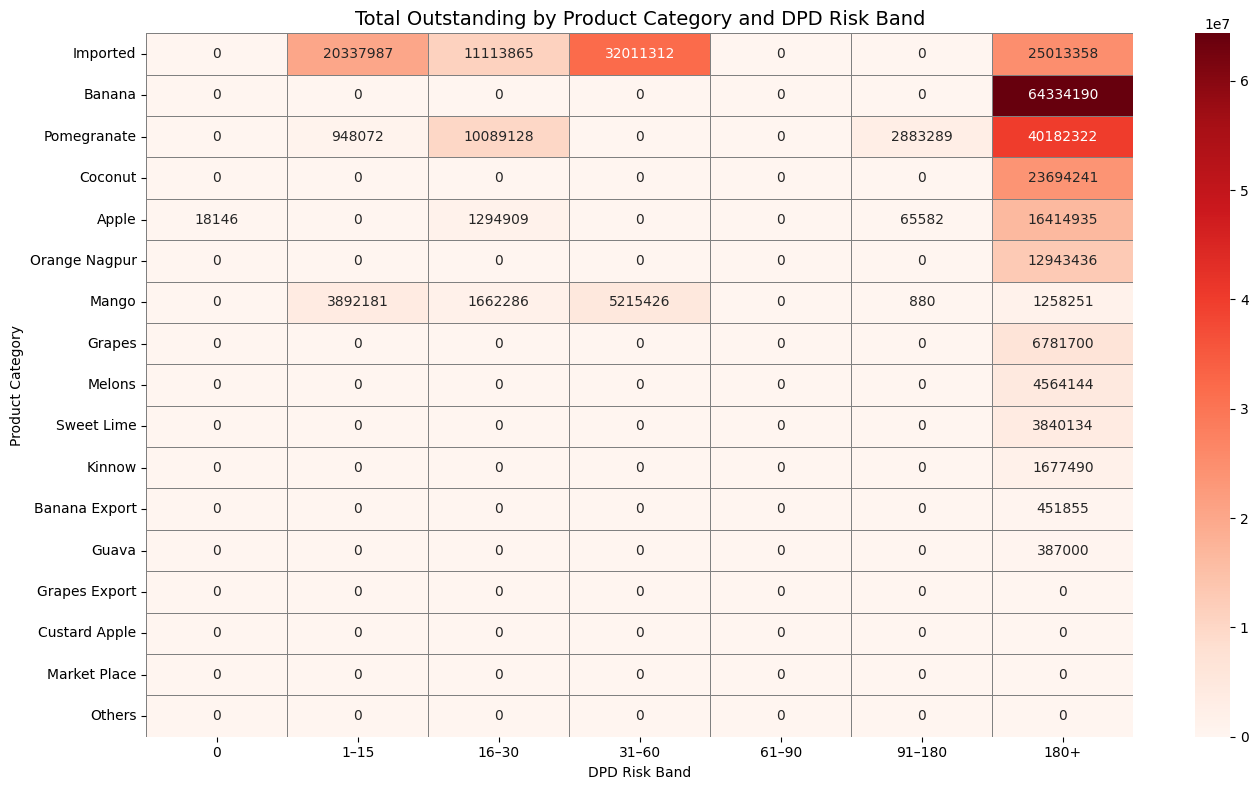

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create pivot for heatmap: Product Category × DPD Risk Band → Total OS
heatmap_data = df.pivot_table(
    index="product_category",
    columns="DPD Risk Band",
    values="Total_OS",
    aggfunc="sum",
    fill_value=0
)

# Define the desired ascending order of DPD Risk Bands
dpd_order = ["0", "1–15", "16–30", "31–60", "61–90", "91–180", "180+"]

# Reindex the columns based on the desired order
heatmap_data = heatmap_data.reindex(columns=dpd_order, fill_value=0)


# Optional: sort by total outstanding
heatmap_data["Total_OS"] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values("Total_OS", ascending=False)
heatmap_data = heatmap_data.drop(columns="Total_OS")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("Total Outstanding by Product Category and DPD Risk Band", fontsize=14)
plt.xlabel("DPD Risk Band")
plt.ylabel("Product Category")
plt.xticks(rotation=0) # Set rotation to 0 for straight labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 📊 **Major Findings from the Heatmap**

### 🔴 **1. Banana is the biggest overdue driver**

* **₹6.4 Cr stuck in 180+ DPD**: This is extremely high and concentrated.
* No amounts in earlier DPDs — implies **historical problem accounts**, possibly written-off or legacy exposure.

➡️ **Implication**: These are highly aged, likely non-recoverable customers.

---

### 🟠 **2. Pomegranate and Imported categories show wide DPD spread**

* **Pomegranate**:

  * ₹1 Cr in 16–30
  * ₹28.8L in 91–180
  * ₹4 Cr in 180+
* **Imported**:

  * ₹2 Cr in 1–15
  * ₹1.1 Cr in 16–30
  * ₹3.2 Cr in 31–60
  * ₹2.5 Cr in 180+

➡️ **Implication**: These are **active but aging portfolios**. They are transitioning into chronic buckets, especially Imported.

---

### 🟡 **3. Mango is at tipping point**

* ₹38L in 1–15, ₹16L in 16–30, ₹52L in 31–60 — steadily aging.
* Indicates **slipping customers**, likely salvageable with intervention.

➡️ **Implication**: Perfect category for **focused recovery efforts** before they slip into hard buckets.

---

### ✅ **4. Clean portfolios with zero DPD across the board**

* **Custard Apple, Grapes Export, Guava, Market Place, Others**
* These categories have **no outstanding in any DPD bucket**.

➡️ **Implication**: Creditworthy segments — potential for **limit enhancement or faster invoice cycles**.

---

### 🟠 **5. Other mid-risk categories**

* **Apple**, **Orange Nagpur**, **Grapes**, **Melons**, **Sweet Lime** have ₹30–160L stuck in 180+.
* Not huge in ₹ terms but still **important to flag** for early escalation.

---

## ✅ **Recommendations**

| Focus Area                | Action Item                                                                     |
| ------------------------- | ------------------------------------------------------------------------------- |
| **Banana (Discontinued)** | Immediate **provisioning/write-off** planning — ₹6.4 Cr likely unrecoverable    |
| **Imported**              | Segment by DPD band and deploy **staggered recovery plan**                      |
| **Pomegranate & Mango**   | Prioritize these for **preventive collections** — they are actively aging       |
| **Grapes Export etc.**    | Explore **credit line upselling** or incentive-based engagement                 |
| **DPD Risk Monitoring**   | Create a monthly heatmap tracker to monitor category-level slippage dynamically |



Let's create individual heatmaps to visualize the total outstanding by product category and DPD risk band for each classification.

This will allow us to easily compare the risk profiles across different business types.

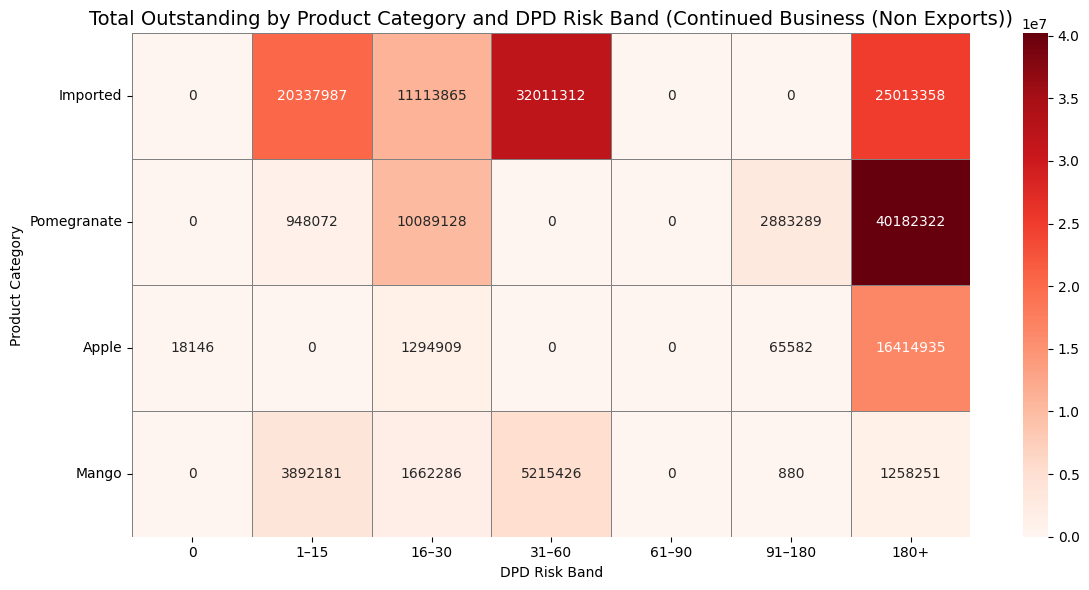

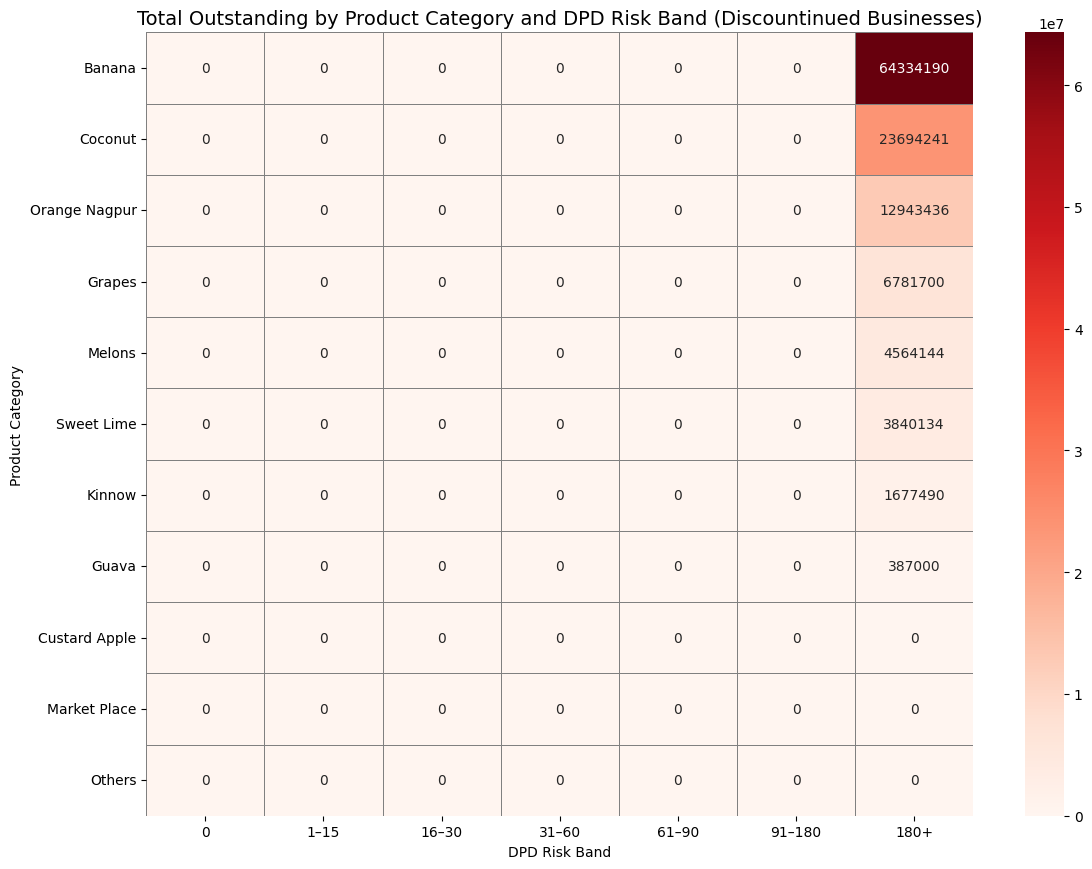

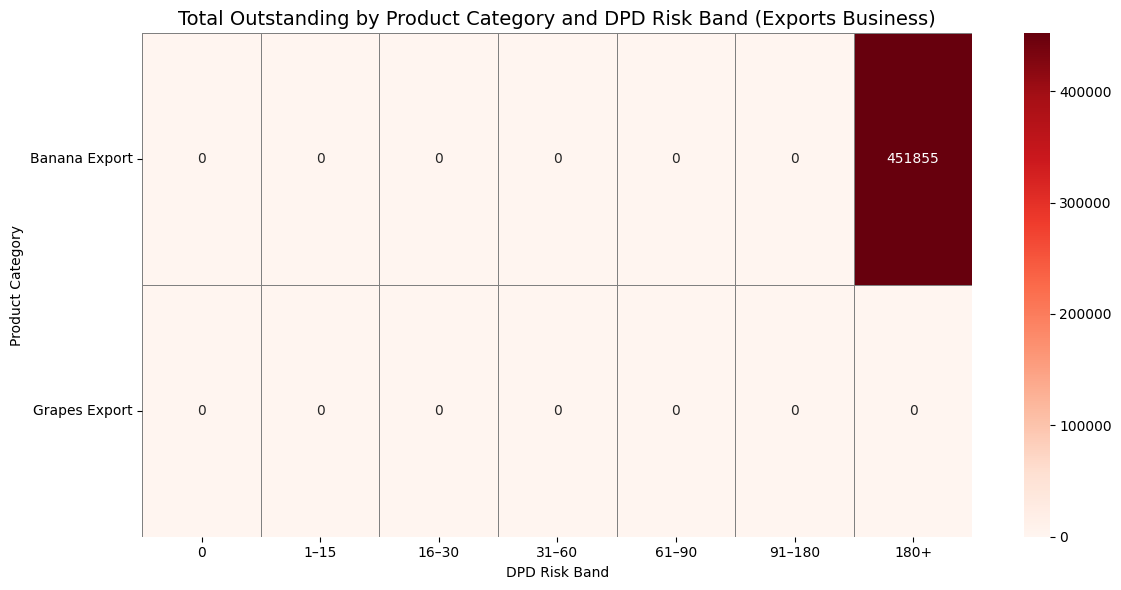

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the desired ascending order of DPD Risk Bands
dpd_order = ["0", "1–15", "16–30", "31–60", "61–90", "91–180", "180+"]

# Get unique classifications
classifications = df['classification'].unique()

# Iterate through each classification and create a heatmap
for classification in classifications:
    # Filter data for the current classification
    df_classified = df[df['classification'] == classification].copy()

    if not df_classified.empty:
        # Create pivot for heatmap for the current classification
        heatmap_data_classified = df_classified.pivot_table(
            index="product_category",
            columns="DPD Risk Band",
            values="Total_OS",
            aggfunc="sum",
            fill_value=0
        )

        # Reindex the columns based on the desired DPD order
        heatmap_data_classified = heatmap_data_classified.reindex(columns=dpd_order, fill_value=0)

        # Optional: sort product categories by total outstanding within this classification
        heatmap_data_classified["Total_OS_Sum"] = heatmap_data_classified.sum(axis=1)
        heatmap_data_classified = heatmap_data_classified.sort_values("Total_OS_Sum", ascending=False)
        heatmap_data_classified = heatmap_data_classified.drop(columns="Total_OS_Sum")


        # Plot heatmap for the current classification
        plt.figure(figsize=(12, max(6, len(heatmap_data_classified.index) * 0.8))) # Adjust figure size based on number of product categories
        sns.heatmap(
            heatmap_data_classified,
            annot=True,
            fmt=".0f",
            cmap="Reds",
            linewidths=0.5,
            linecolor='gray'
        )
        plt.title(f"Total Outstanding by Product Category and DPD Risk Band ({classification})", fontsize=14)
        plt.xlabel("DPD Risk Band")
        plt.ylabel("Product Category")
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for classification: {classification}")

| Product         | Risky DPD Bands                                                    | Comments                                                              |
| --------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------- |
| **Imported**    | ₹2.03 Cr (1–15), ₹1.11 Cr (16–30), ₹3.2 Cr (31–60), ₹2.5 Cr (180+) | Severe slippage across DPD bands → urgent collection & limit reevaluation |
| **Pomegranate** | ₹94L (1–15), ₹1 Cr (16–30), ₹28.8L (91–180), ₹4 Cr (180+)          | Creeping into chronic buckets → provision alert                       |
| **Apple**       | ₹12.9L (16–30), ₹65K (91–180), ₹1.64 Cr (180+)                     | Small but aging exposures                                             |
| **Mango**       | ₹38.9L (1–15), ₹16.6L (16–30), ₹52.1L (31–60), ₹12.6L (180+)       | Slipping from early to hard → strong candidate for recovery           |


 The segmented heatmaps are excellent views that help split risk clearly between **Continued Business (Non Exports)** and **Discontinued Businesses**. Here's the strategic breakdown:

---

## 🟢 **Continued Business (Non Exports)**

(*Your core active portfolio — high priority for credit management*)

### 🔍 Key Observations:

| Product         | Risky DPD Bands                                                    | Comments                                                              |
| --------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------- |
| **Imported**    | ₹2.03 Cr (1–15), ₹1.11 Cr (16–30), ₹3.2 Cr (31–60), ₹2.5 Cr (180+) | Severe slippage across bands → urgent collection & limit reevaluation |
| **Pomegranate** | ₹94L (1–15), ₹1 Cr (16–30), ₹28.8L (91–180), ₹4 Cr (180+)          | Creeping into chronic buckets → provision alert                       |
| **Apple**       | ₹12.9L (16–30), ₹65K (91–180), ₹1.64 Cr (180+)                     | Small but aging exposures                                             |
| **Mango**       | ₹38.9L (1–15), ₹16.6L (16–30), ₹52.1L (31–60), ₹12.6L (180+)       | Slipping from early to hard → strong candidate for recovery           |

---

### ✅ Recommendations for Continued Business:

1. **Immediate Collections Push**:

   * Focus on **Imported** and **Mango** — they are alive but aging.
   * Prioritize overdue in **31–60 and 91–180** buckets to avoid ballooning into 180+.

2. **Dynamic Risk Flagging**:

   * Auto-tag partners entering **16–30 or 31–60** bands with credit hold triggers or risk alerts.

3. **Customer Engagement**:

   * Retain customers with high sales but recent slips (1–15 or 16–30) with payment plans.

4. **Provision Plan**:

   * Create a partial provision pool for **Pomegranate (91–180 and 180+)**.

---

## 🔴 **Discontinued Businesses**

(*Legacy load – not generating new sales, but carrying credit drag*)

### 🔍 Key Observations:

| Product           | Total Outstanding (180+) |
| ----------------- | ------------------------ |
| **Banana**        | ₹6.43 Cr 🟥              |
| **Coconut**       | ₹2.36 Cr                 |
| **Orange Nagpur** | ₹1.29 Cr                 |
| **Grapes**        | ₹67.8L                   |
| **Melons**        | ₹45.6L                   |
| **Sweet Lime**    | ₹38.4L                   |
| **Kinnow**        | ₹16.7L                   |
| *(Others)*        | 0 or negligible          |

---

### ✅ Recommendations for Discontinued Businesses:

1. **Provision & Write-off Strategy**:

   * Majority in **180+ DPD** — very unlikely to recover.
   * Prepare **full provisioning** for Banana, Coconut, Orange Nagpur.

2. **Blacklist Defaulters**:

   * All customers with 180+ from discontinued SKUs should be added to **credit exclusion** lists.

3. **Recovery Push (Low Cost)**:

   * Send one-time legal demand notices to recover ₹50L+ OS pools (Banana, Coconut).

---

## 🧭 Summary View

| Business Type              | Key Concern             | Next Step                        |
| -------------------------- | ----------------------- | -------------------------------- |
| **Continued (Non Export)** | Active slippage in 1–60 | Collections + Credit Flags       |
| **Discontinued**           | ₹13+ Cr in 180+ DPD     | Provision + Legal Push + Closure |



In [ ]:
# Step 1: Install required packages
!pip install python-pptx openpyxl seaborn --quiet

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches, Pt

# Step 3: Upload Excel file
from google.colab import files
uploaded = files.upload()

# Step 4: Load and process data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def classify_dpd(row):
    if row["OS DPI 110+"] > 0:
        return "180+"
    elif row["OS DPI 60-110"] > 0:
        return "91–180"
    elif row["OS DPI 45-60"] > 0 or row["OS DPI 31-45"] > 0:
        return "31–60"
    elif row["OS DPI 16-30"] > 0:
        return "16–30"
    elif row["OS DPI 1-15"] > 0:
        return "1–15"
    else:
        return "0"

df["DPD Risk Band"] = df.apply(classify_dpd, axis=1)

# Step 5: Segment data
continued = ["Apple", "Imported", "Mango", "Pomegranate"]
discontinued = ["Banana", "Coconut", "Orange Nagpur", "Grapes", "Melons", "Sweet Lime", "Kinnow", "Guava", "Custard Apple", "Market Place", "Others"]

df_c = df[df["product_category"].isin(continued)]
df_d = df[df["product_category"].isin(discontinued)]

# Step 6: Create heatmaps
def generate_heatmap(df_segment, title, file_name):
    dpd_order = ["0", "1–15", "16–30", "31–60", "61–90", "91–180", "180+"]
    dpd_cols = sorted(df_segment["DPD Risk Band"].unique(), key=lambda x: dpd_order.index(x))
    data = df_segment.pivot_table(index="product_category", columns="DPD Risk Band", values="Total_OS", aggfunc="sum", fill_value=0)[dpd_cols]

    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, linecolor='gray')
    plt.title(title, fontsize=14)
    plt.xlabel("DPD Risk Band")
    plt.ylabel("Product Category")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(file_name)
    plt.close()

generate_heatmap(df_c, "Continued Business – Total OS by DPD Band", "continued_heatmap.png")
generate_heatmap(df_d, "Discontinued Business – Total OS by DPD Band", "discontinued_heatmap.png")

# Step 7: Generate PPTX
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
bullet_slide_layout = prs.slide_layouts[1]
blank_slide_layout = prs.slide_layouts[6]

# Slide 1: Title
slide = prs.slides.add_slide(title_slide_layout)
slide.shapes.title.text = "DPD Risk Summary Report"
slide.placeholders[1].text = "Fullstack Customer EDA | June 2025"

# Slide 2: Key Insights
slide = prs.slides.add_slide(bullet_slide_layout)
slide.shapes.title.text = "Key Portfolio Insights"
slide.placeholders[1].text = (
    "- Banana (Discontinued): ₹6.4 Cr in 180+ DPD\n"
    "- Imported: ₹2–3 Cr spread across 1–60 DPD\n"
    "- Pomegranate: Risk aging into 91–180 & 180+\n"
    "- Mango: Slipping across 1–60 buckets\n"
    "- Apple: ₹1.6 Cr already in 180+ DPD"
)

# Slide 3: Recommendations
slide = prs.slides.add_slide(bullet_slide_layout)
slide.shapes.title.text = "Strategic Recommendations"
slide.placeholders[1].text = (
    "- Focus collections on 1–60 DPD in active SKUs\n"
    "- Provision for all 180+ overdue in discontinued\n"
    "- Credit alert tagging at 16+ DPD band\n"
    "- Write-off plan + legal notice for chronic cases"
)

# Slide 4: Continued Heatmap
slide = prs.slides.add_slide(blank_slide_layout)
slide.shapes.add_picture("continued_heatmap.png", Inches(0.5), Inches(0.5), width=Inches(8.5))

# Slide 5: Discontinued Heatmap
slide = prs.slides.add_slide(blank_slide_layout)
slide.shapes.add_picture("discontinued_heatmap.png", Inches(0.5), Inches(0.5), width=Inches(8.5))

# Slide 6: Customer-Level Examples
slide = prs.slides.add_slide(bullet_slide_layout)
slide.shapes.title.text = "Customer-Level Callouts"
slide.placeholders[1].text = (
    "- Example A: Mango, ₹52L in 31–60 DPD → recovery candidate\n"
    "- Example B: Apple, ₹1.6 Cr in 180+ → provision needed\n"
    "- Example C: Pomegranate, slipping into 91–180\n"
    "- Example D: Banana (Discontinued), ₹6.4 Cr → write-off"
)

# Save
output_file = "DPD_Risk_Summary_Enhanced.pptx"
prs.save(output_file)
files.download(output_file)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 11.6 MB/s eta 0:00:00


Saving Fullstack_Customer EDA-20th June 2025 -Initial File.xlsx to Fullstack_Customer EDA-20th June 2025 -Initial File (2).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Fullstack_Customer EDA-20th June 2025 -Initial File.xlsx to Fullstack_Customer EDA-20th June 2025 -Initial File (1).xlsx


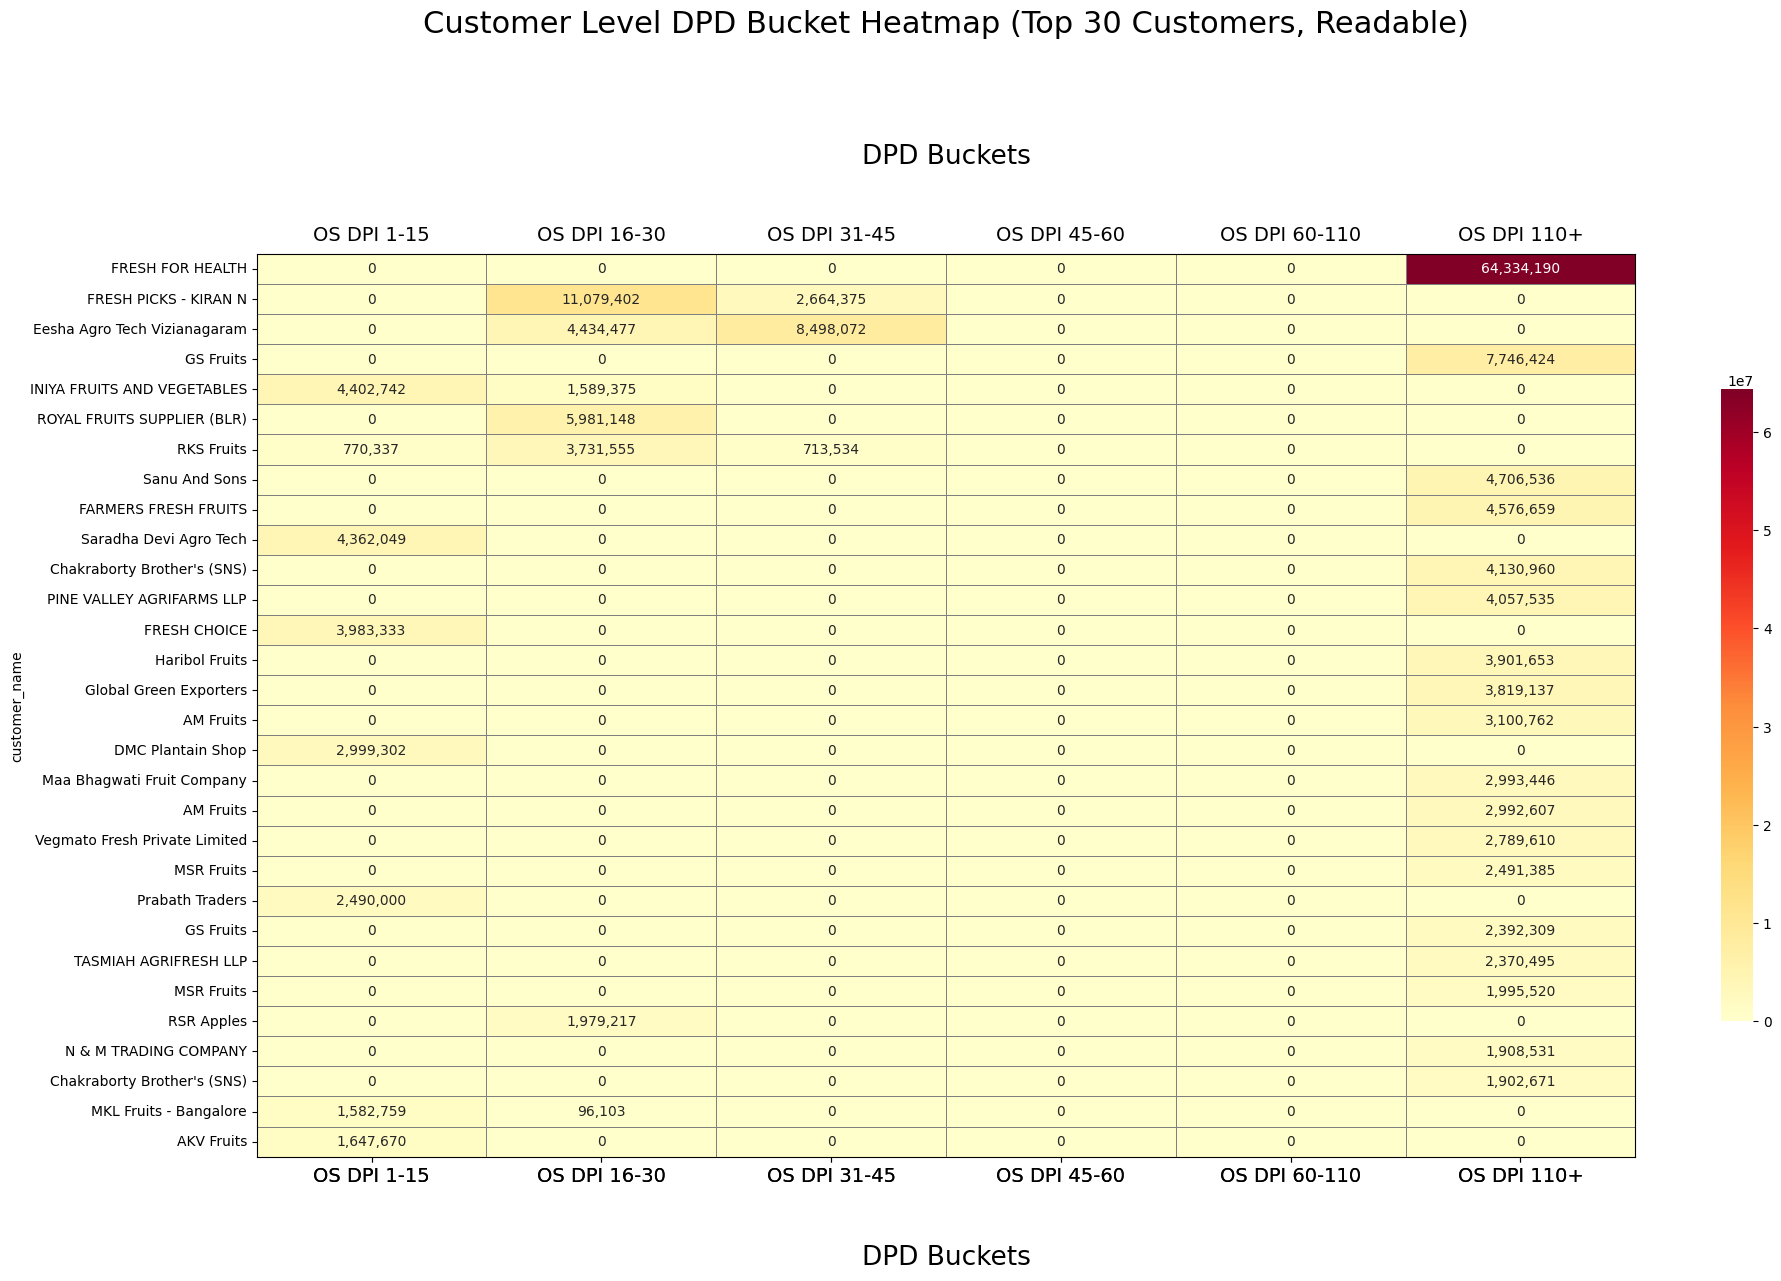

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Remove this line if not using Colab

# Upload and read your Excel file
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_excel(file_name, sheet_name='Sheet1')

# Prepare top-N customers
dpd_columns = ['OS DPI 1-15', 'OS DPI 16-30', 'OS DPI 31-45', 'OS DPI 45-60', 'OS DPI 60-110', 'OS DPI 110+']
df['Total_OS'] = df[dpd_columns].sum(axis=1)
df_dpd = df.sort_values('Total_OS', ascending=False).head(30).set_index('customer_name')

fig, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(
    df_dpd[dpd_columns],
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=',.0f',
    cbar_kws={'shrink': 0.7},
    ax=ax
)

# TOP column headings
ax.set_xticklabels(dpd_columns, rotation=0, ha='center', fontsize=14)
ax.xaxis.set_label_position('top')
ax.set_xlabel('DPD Buckets', fontsize=19)
ax.xaxis.set_label_coords(0.5, 1.10)  # Moves x-label above tick labels

# BOTTOM column headings (duplicate axis)
ax_bottom = ax.twiny()
ax_bottom.set_xlim(ax.get_xlim())
ax_bottom.set_xticks(ax.get_xticks())
ax_bottom.set_xticklabels(dpd_columns, rotation=0, ha='center', fontsize=14)
ax_bottom.xaxis.set_label_position('top')
ax_bottom.set_xlabel('DPD Buckets',fontsize=19)
ax_bottom.xaxis.set_label_coords(0.5, -0.12)
ax_bottom.tick_params(top=False, bottom=True, labeltop=True, labelbottom=True)

# Y-axis and overall appearance
plt.title('Customer Level DPD Bucket Heatmap (Top 30 Customers, Readable)', fontsize=22, pad=80)
plt.ylabel('Customer Name', fontsize=17)
plt.yticks(fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensures all parts fit

plt.show()


## Major Analysis of the Customer-Level DPD Bucket Heatmap

### Key Insights

- **Concentration of Overdues in Highest Bucket:**  
  The majority of overdue amounts are concentrated in the "OS DPI 110+" bucket. Notably, FRESH FOR HEALTH has ₹64,334,190 entirely in this oldest bucket, indicating a significant risk for unrecovered funds and severe delinquency. Other customers with sizable amounts in "OS DPI 110+" include G5 Fruits (₹7,746,424).[1]

- **Few Customers Drive Most Risk:**  
  Only a handful of customers have large outstanding amounts in high DPD buckets. The top three or four customers make up most of the total overdue balance, implying that risk management efforts should focus heavily on these accounts.[1]

- **Buckets 16-30, 31-45 Show Activity:**  
  Some customers, such as FRESH PICKS - KIRAN N and Eesha Agro Tech Vizianagaram, have large balances in earlier buckets (16-30, 31-45). For example, FRESH PICKS - KIRAN N has ₹11,079,402 in "OS DPI 16-30" and ₹2,664,375 in "OS DPI 31-45." These may represent active, recently overdue customers and offer potential for collection interventions.[1]

- **Majority Have Zero in Most Buckets:**  
  Many rows (customers) have zeros in most buckets, suggesting that overdue exposures are not broadly spread but highly concentrated with select customers.[1]

- **Early Buckets (1-15) Mostly Empty:**  
  Minimal amounts are present in "OS DPI 1-15," indicating few new overdues or efficient collection at the earliest stage.

### Risk Management Implications

- **Priority Customers:**  
  - Immediate escalation and intensive collection for customers in "OS DPI 110+" (especially FRESH FOR HEALTH, G5 Fruits).
  - Focused follow-up on those with amounts in 16-45 DPD buckets to prevent slippage into older overdue categories.

- **Bucket Distribution:**  
  - Overdue balances are not evenly distributed; problem accounts should be treated with individualized strategies rather than blanket policies.

### Visual Analysis

- **Heatmap Readability:**  
  - Dark red/strong colors instantly show at-risk customers and buckets.
  - Comma-formatted numbers improve quick recognition.

### Summary Table

| Major DPD Bucket      | Major Customers                 | Amount Example           |
|----------------------|---------------------------------|-------------------------|
| OS DPI 110+          | FRESH FOR HEALTH, G5 Fruits     | ₹64,334,190, ₹7,746,424 |
| OS DPI 16-30, 31-45  | FRESH PICKS-KIRAN N, Eesha Agro | ₹11,079,402, ₹8,498,072 |
| OS DPI 45-110        | Scattered, lower amounts        | Less than ₹5,000,000    |

***

**Recommendation:**  
- Target the top 3-5 overdue customers for urgent resolution.
- Monitor and intervene early where high amounts start appearing in buckets 16-45, before they escalate.

